<a href="https://colab.research.google.com/github/maneakansha36/my_first_repository/blob/main/_unsupervised_learning_casestudy_akanksha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import matplotlib.pyplot as plt




#**1.Data preprocessing**

In [ ]:
data = pd.read_csv("/content/adult_dataset.csv", na_values='?')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
data.shape

(19068, 15)

In [ ]:
X = data.drop('income', axis=1)
y = data['income']

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [ ]:
#Handle Missing Values

# Impute numerical with median
num_imputer = SimpleImputer(strategy='median')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# Impute categorical with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

In [ ]:
#Encode Categorical Variables

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cat = encoder.fit_transform(X[cat_cols])


# Create DataFrame for encoded columns

encoded_cat_df = pd.DataFrame(encoded_cat,
                              columns=encoder.get_feature_names_out(cat_cols),
                              index=X.index)

In [ ]:
X = X.drop(columns=cat_cols)
X= pd.concat([X, encoded_cat_df], axis=1)

In [ ]:
# Detect & Treat Outliers (IQR Capping)

for col in num_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X[col] = X[col].clip(lower, upper)

In [ ]:
#Scale Numerical Features

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
# preprocessed data
print("Shape after preprocessing:", X.shape)
print("Sample data:")
print(X.head())

Shape after preprocessing: (19068, 105)
Sample data:
        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.040293 -1.152032       1.172504           0.0           0.0   
1  0.874374 -1.091050       1.172504           0.0           0.0   
2 -0.035533  0.301552      -0.461250           0.0           0.0   
3  1.101851  0.502285      -1.278127           0.0           0.0   
4 -0.793789  1.593425       1.172504           0.0           0.0   

   hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0       -0.185787                    0.0                  0.0   
1       -1.430402                    0.0                  0.0   
2       -0.185787                    0.0                  0.0   
3       -0.185787                    0.0                  0.0   
4       -0.185787                    0.0                  0.0   

   workclass_Never-worked  workclass_Private  ...  native-country_Portugal  \
0                     0.0                0.0  ...                    

#**2.Exploratory Analysis**

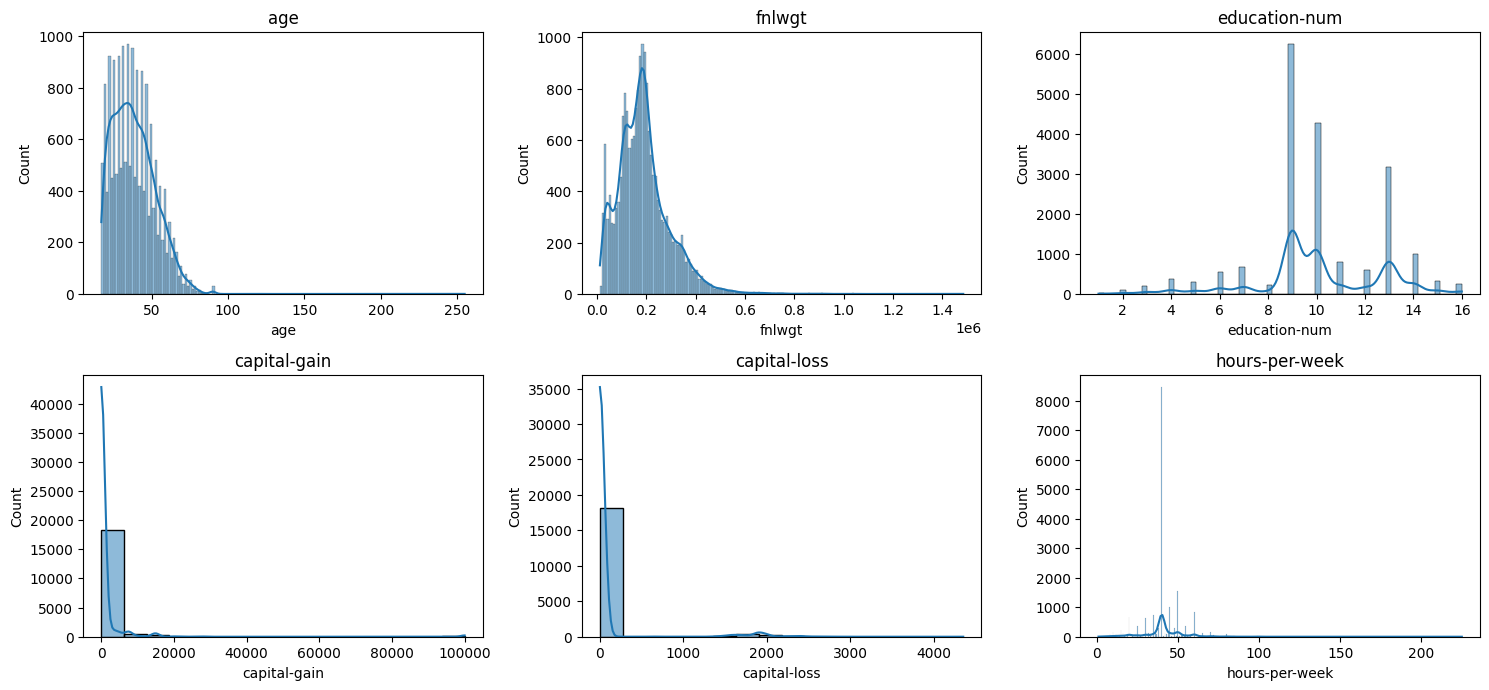

In [ ]:
# Numerical Columns
num_cols = data.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

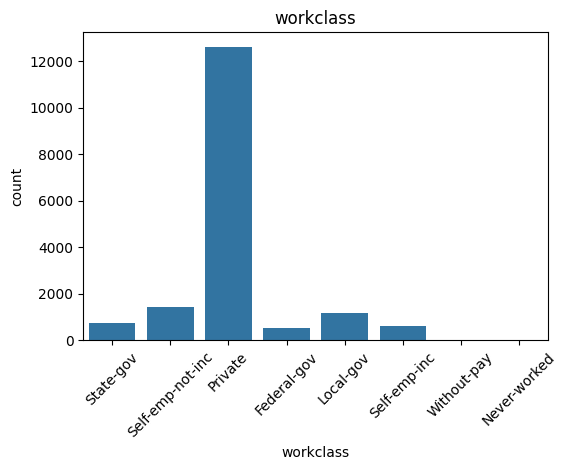

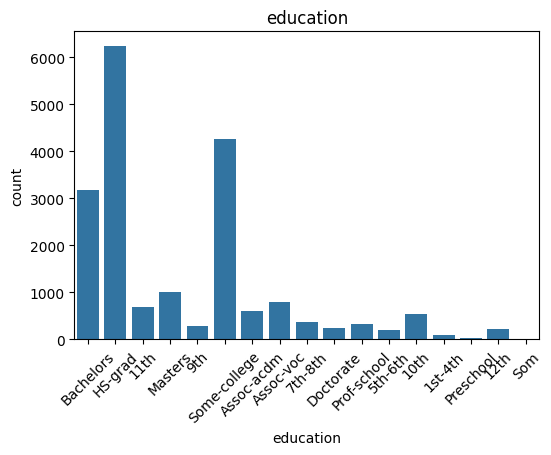

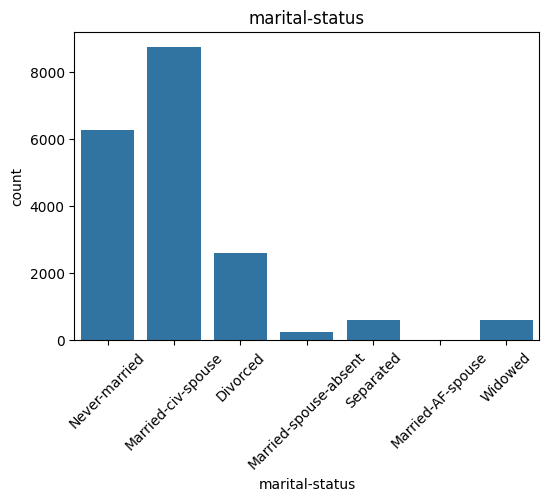

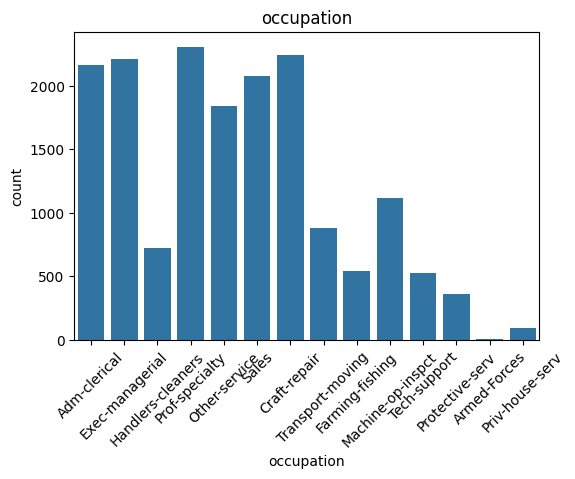

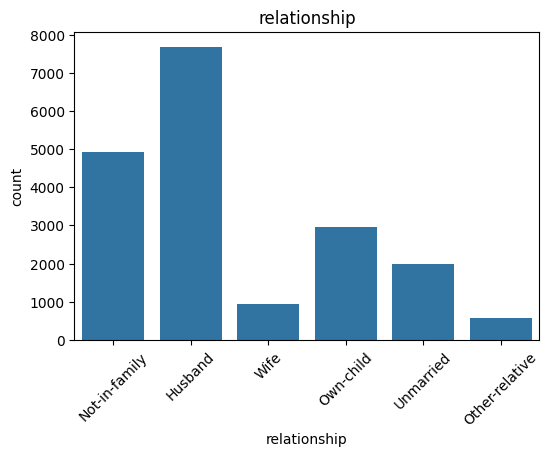

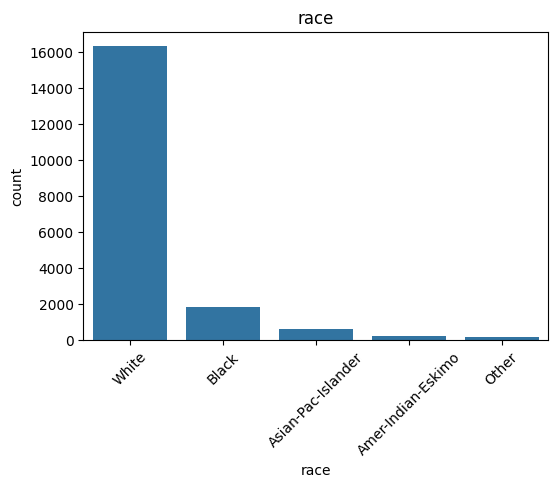

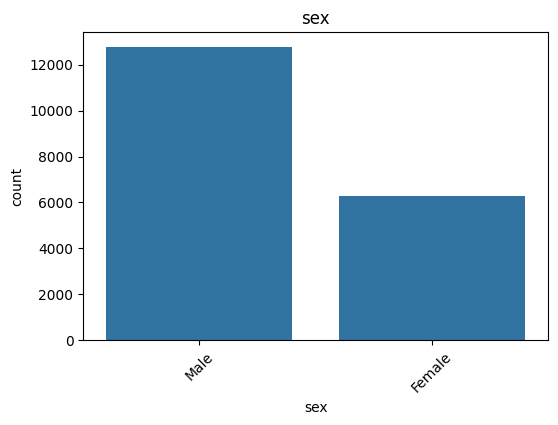

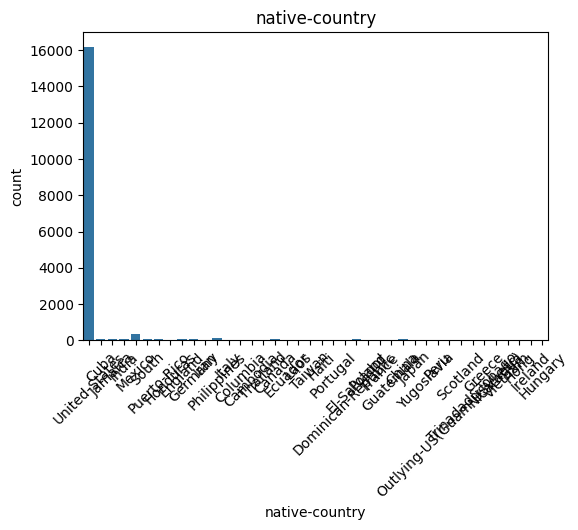

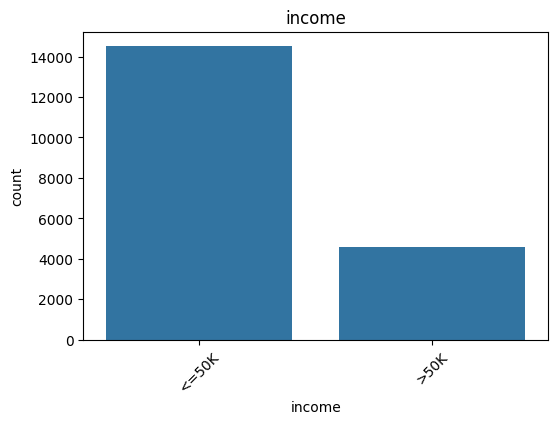

In [ ]:
# Categorical Columns
cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=data[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

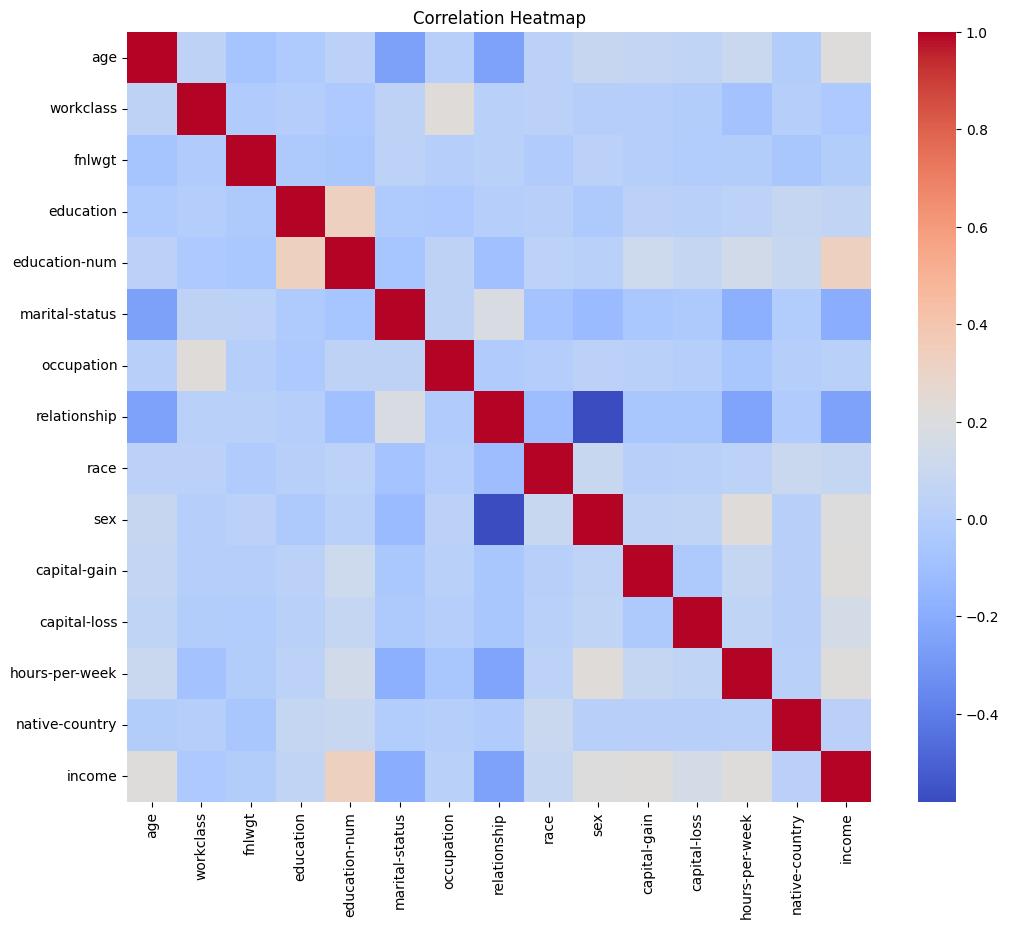

In [ ]:
data_corr = data.copy()
data_corr['income'] = (data_corr['income'] == '>50K').astype(int)

from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    data_corr[col] = LabelEncoder().fit_transform(data_corr[col])

plt.figure(figsize=(12,10))
sns.heatmap(data_corr.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

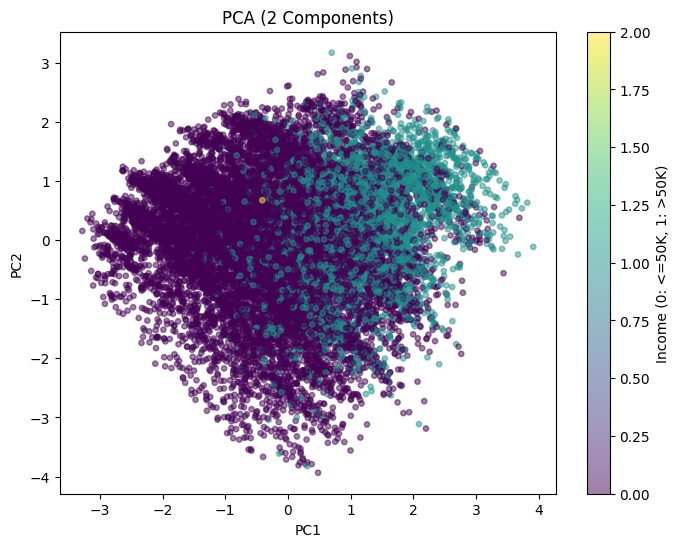

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
# Apply PCA on the preprocessed and scaled X
pca_result = pca.fit_transform(X)

# Encode the target variable 'y' for coloring the scatter plot
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=y_encoded, alpha=0.5, s=15)
plt.title("PCA (2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Income (0: <=50K, 1: >50K)') # Add a colorbar with labels
plt.show()

#**3.Clustering**

In [ ]:
#apply clustering algorithms

# k means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

data['cluster'] = clusters

In [ ]:
#Agglomarative clustering
from sklearn.cluster import AgglomerativeClustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
agglomerative = AgglomerativeClustering(n_clusters=2)
clusters = agglomerative.fit_predict(X_scaled)
data['cluster'] = clusters

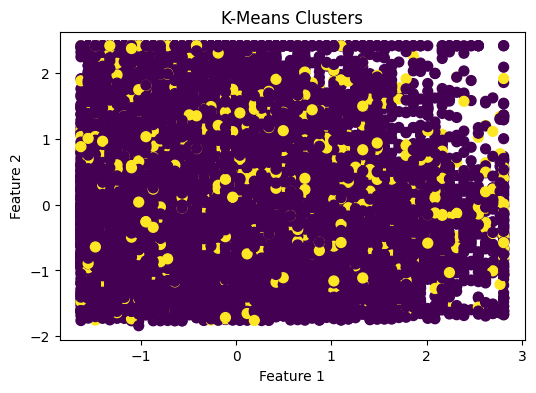

In [ ]:
#visualize clusters (2d plots color code cluster)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=data['cluster'], s=50)
plt.title("K-Means Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

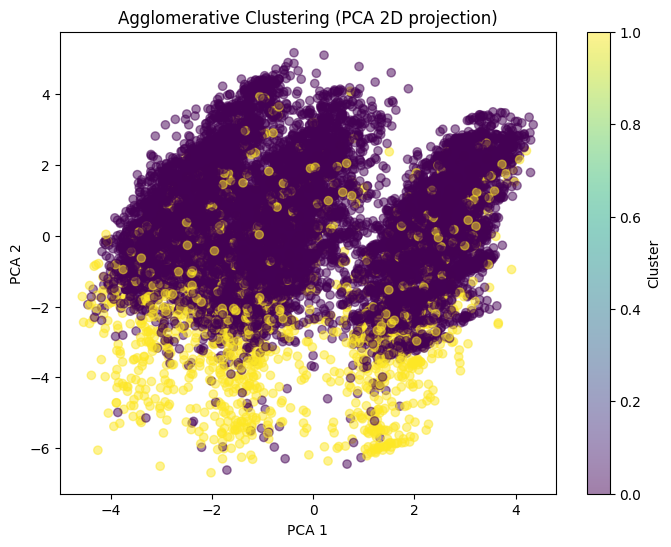

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to dataframe
data['pca1'] = X_pca[:,0]
data['pca2'] = X_pca[:,1]

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data['pca1'], data['pca2'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.title("Agglomerative Clustering (PCA 2D projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


#**4.Interpretation and profiling**

In [ ]:
cluster_summary = data.select_dtypes(include=np.number).groupby('cluster').mean()
print("Cluster Summary (numeric features):")
print(cluster_summary)

Cluster Summary (numeric features):
               age         fnlwgt  education-num  capital-gain  capital-loss  \
cluster                                                                        
0        38.543686  187559.091302      10.226568    1077.53949     89.124374   
1        39.466955  214336.056792       8.673302     904.57904     73.955504   

         hours-per-week      pca1      pca2  
cluster                                      
0             40.532222  0.046825  0.186366  
1             39.590347 -0.475929 -1.894210  


In [ ]:
# Compare clusters with actual income
income_map = {'<=50K': 0, '>50K': 1}
data['income_num'] = data['income'].map(income_map)
income_cluster = pd.crosstab(data['cluster'], data['income'])
print("\nCluster vs Income Distribution:")
print(income_cluster)


Cluster vs Income Distribution:
income   <=50K  >50K
cluster             
0        13107  4252
1         1402   306


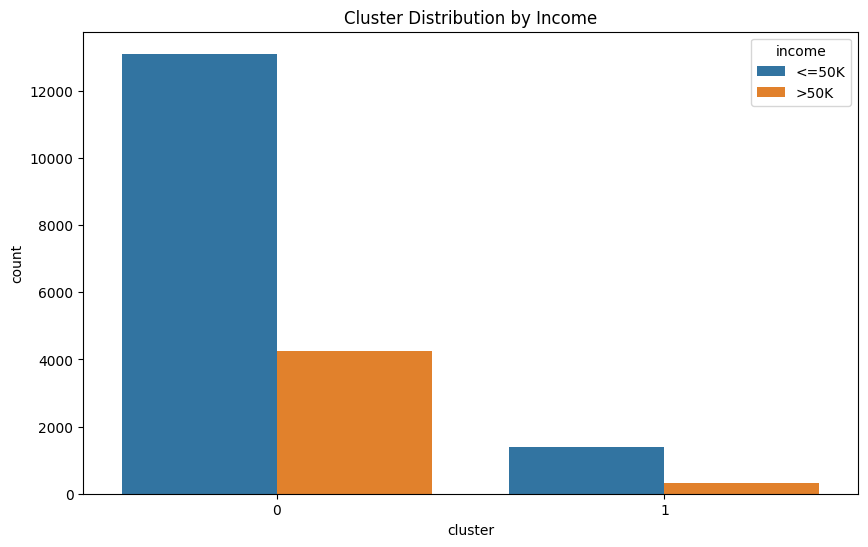

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='cluster', hue='income', data=data)
plt.title("Cluster Distribution by Income")
plt.show()

In [ ]:
# Suggest interventions based on profiling
for cluster in data['cluster'].unique():
    print(f"\nCluster {cluster} profiling insights:")
    avg_hours = cluster_summary.loc[cluster, 'hours-per-week']
    avg_education = cluster_summary.loc[cluster, 'education-num']
    avg_age = cluster_summary.loc[cluster, 'age']
    print(f"- Average age: {avg_age:.1f}")
    print(f"- Average education level: {avg_education:.1f}")
    print(f"- Average working hours per week: {avg_hours:.1f}")
    if avg_education < 10:
        print("- Suggestion: Upskilling programs")
    if cluster_summary.loc[cluster, 'capital-gain'] < 1000:
        print("- Suggestion: Financial aid or inclusion efforts")


Cluster 0 profiling insights:
- Average age: 38.5
- Average education level: 10.2
- Average working hours per week: 40.5

Cluster 1 profiling insights:
- Average age: 39.5
- Average education level: 8.7
- Average working hours per week: 39.6
- Suggestion: Upskilling programs
- Suggestion: Financial aid or inclusion efforts
